## RAPTOR: Recursive Abstractive Processing for Tree-Organized Retrieval
RAPTOR 논문은 문서의 색인 생성 및 검색에 대한 흥미로운 접근 방식을 제시합니다.
https://arxiv.org/pdf/2401.18059.pdf

* leafs는 시작 문서 집합입니다.
* leafs는 임베딩되어 클러스터링됩니다.
* 그런 다음 클러스터는 유사한 문서들 간의 정보를 더 높은 수준(더 추상적인)으로 요약합니다.

이 과정은 재귀적으로 수행되어, 원본 문서(leafs)에서 더 추상적인 요약으로 이어지는 "트리"를 형성합니다.

이를 다양한 규모에서 적용할 수 있습니다; leafs는 다음과 같을 수 있습니다:
* 단일 문서에서의 텍스트 청크(논문에서 보여준 것처럼)
* 전체 문서(아래에서 보여주는 것처럼)

더 긴 컨텍스트의 LLMs를 사용하면, 전체 문서에 대해 이 작업을 수행할 수 있습니다.

웹 문서에서 텍스트 데이터를 추출하고, 텍스트의 토큰 수를 계산하여 히스토그램으로 시각화하는 과정을 설명합니다.

* tiktoken 라이브러리를 사용하여 주어진 인코딩 이름에 따라 문자열의 토큰 수를 계산합니다.
* RecursiveUrlLoader 클래스를 사용하여 지정된 URL에서 웹 문서를 재귀적으로 로드합니다. 
* 이 과정에서 BeautifulSoup를 활용하여 HTML 문서에서 텍스트를 추출합니다.
* 여러 URL에서 문서를 로드하여 모든 텍스트 데이터를 하나의 리스트에 모읍니다.
* 각 문서 텍스트에 대해 num_tokens_from_string 함수를 호출하여 토큰 수를 계산하고, 이를 리스트에 저장합니다.
* matplotlib를 사용하여 계산된 토큰 수의 분포를 히스토그램으로 시각화합니다. 히스토그램은 토큰 수를 x축에, 해당 토큰 수를 가진 문서의 빈도수를 y축에 나타냅니다.
* 히스토그램은 데이터의 분포를 이해하는 데 도움을 주며, 특히 텍스트 데이터의 길이 분포를 시각적으로 파악할 수 있습니다.

In [9]:
from youtube_transcript_api import YouTubeTranscriptApi
from bs4 import BeautifulSoup as Soup
import tiktoken
import matplotlib.pyplot as plt

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    # 주어진 문자열에서 토큰의 개수를 반환합니다.
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

def get_transcript_texts(video_id, languages=['ko', 'en']):
    captions = YouTubeTranscriptApi.get_transcript(video_id, languages=languages)
    texts = [caption['text'] for caption in captions]
    return captions, texts

url = "https://youtu.be/KFibP7KnDVM"

subscript, texts = get_transcript_texts("KFibP7KnDVM") 
docs = " ".join(texts)
docs

"hi everyone my name is Girish and in this video we will be building a chat with your PDF application we will use Amazon badrock and use the Titans embedding model as well as anthropics cloudy model to build this application we will also use Technologies like rag which is retrieval augmented generation L chain stream L Docker S3 F Vector index Etc I'm super excited to build this application in EN handson video like this and I hope you like it let's take a look at quick demo of what we will be building and then we'll start doing the handson coding so I have downloaded this particular PDF from a arthritis website and I have created something called Vector embedding and which I'm storing in a S3 bucket and in my client application I want to query this PDF or chat with this PDF asking it a question and hopefully it can answer me uh with the contact that I provide based on the vector embedding that I created so let's go to my client application real quick and I'm just doing some um I'm down

<function matplotlib.pyplot.show(close=None, block=None)>

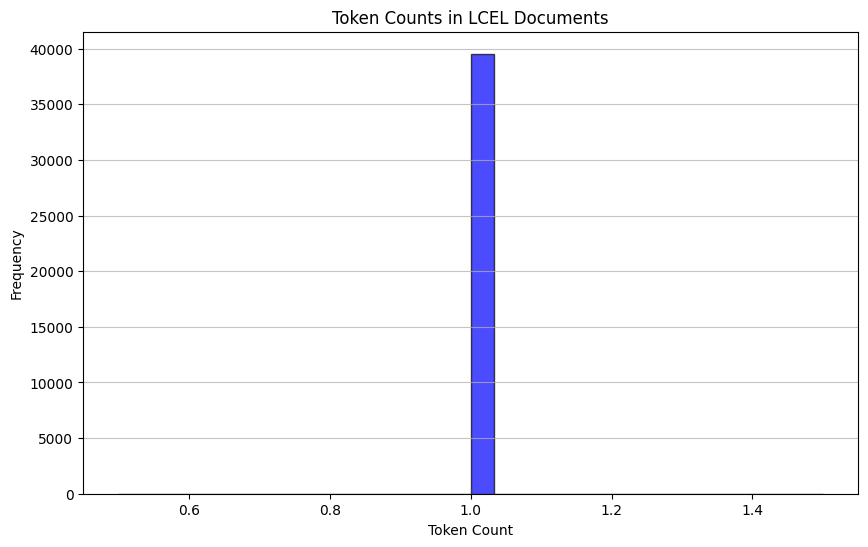

In [12]:
counts = [num_tokens_from_string(d, "cl100k_base") for d in docs]
# 토큰 수의 히스토그램을 그립니다.
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Token Counts in LCEL Documents")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# 히스토그램을 표시합니다.
plt.show